In [1]:
### Important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Dataset
df=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [3]:
### About dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


### Insights

1. There are 11 features present in our dataset.

2. Out of 11 features 4 are integers, 4 are objects, 2 are floats and 1 is boolian.

In [4]:
### Shape of the dataset

df.shape

(350, 11)

### Insights
1. In our dataset 350 rows and 11 columns are present

In [5]:
### Top five datapoints

df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [6]:
### Last five datapoints

df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [7]:
### Missing values check

df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

### Insights

1. From the above code there are two missing values present in satisfaction level column

## Important Observation
1. As there is only 2 missing values are present in our dataset and it is very less as compare to shape of our dataset to the best way to deal in this case is to drop these datapoints where the null values are present

In [8]:
## Drop null values
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [9]:
df.drop(['index'],axis=1,inplace=True)

In [10]:
## Again null values check
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

## Insights
1. From the output of the above code we can say that there is no null values present in our dataset

In [11]:
### Duplicate datapoints check

df.duplicated().sum()

0

### Insights
1. From the above code there is no duplicate value present in our dataset

In [12]:
### Unique values check and its occurance in dataset

for i in df.columns:
    print(i,"\n")
    print(df[i].value_counts(),"\n")

Customer ID 

101    1
332    1
340    1
339    1
338    1
      ..
216    1
215    1
214    1
213    1
450    1
Name: Customer ID, Length: 348, dtype: int64 

Gender 

Male      175
Female    173
Name: Gender, dtype: int64 

Age 

30    48
32    33
43    25
27    25
31    25
35    25
36    25
34    24
41    24
28    24
37    22
29    11
33    10
42     9
26     9
38     9
Name: Age, dtype: int64 

City 

New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          56
Name: City, dtype: int64 

Membership Type 

Gold      117
Silver    117
Bronze    114
Name: Membership Type, dtype: int64 

Total Spend 

710.40     15
505.75     12
470.50     12
820.90     12
1140.60    11
           ..
530.40      1
1360.20     1
700.60      1
450.90      1
1120.20     1
Name: Total Spend, Length: 76, dtype: int64 

Items Purchased 

10    47
9     34
8     33
12    33
13    32
11    28
15    24
21    24
16    24
7     23
20    19
14    11
18    

In [13]:
### Decription about the mathematics features

df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


### Insights
1. Minimum age customer is 26 years and maximum age is 43 years

2. Minimum spending by customer is 410.80 and maximum spending is 1520.10

3. Minimum items purchased by customer is 7 and maximum is 21

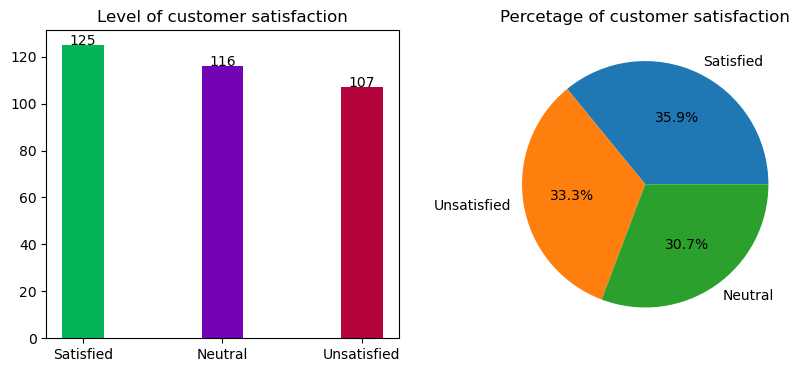

In [14]:
### Bar graph and piechart of customer satisfaction

x=df['Satisfaction Level'].unique()
y=df['Satisfaction Level'].value_counts()
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].set_title("Level of customer satisfaction")
ax[0].bar(x=x,height=y,color=('#03B557','#7403B5','#B5033C'),width=0.3)
for i in range(len(x)):
    ax[0].text(i,y[i],y[i],ha='center')
ax[1].set_title("Percetage of customer satisfaction")
ax[1].pie(y,autopct='%1.1f%%',labels=y.index)
plt.show()

### Insights
1. From the above graphs 125 customers(35.9%) are satisfied, 116 customers (30.7%) are neutral and 107 (33.3%) are unsatified

2. Almost equal number of customers are present in all the categories of satisfaction level

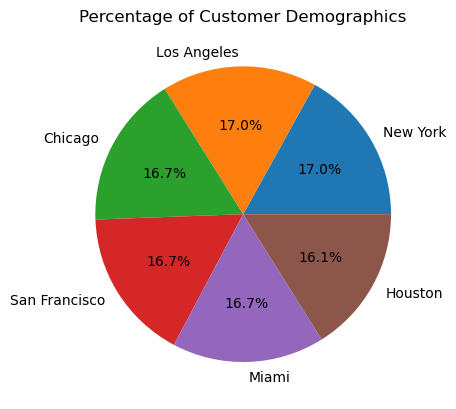

In [15]:
### Pie chart of customer demographics

plt.title('Percentage of Customer Demographics')
plt.pie(df['City'].value_counts(),autopct='%1.1f%%',labels=df['City'].value_counts().index)
plt.show()

### Insights

From the above pie chart
    
    1. Percentage of customers in LA and NY is 17.0% each.
    
    2. Percentage of customers in Chicago, San Francisco, and Miami is 16.7% each.
    
    3. Percentage of customers in Houston is 16.1%

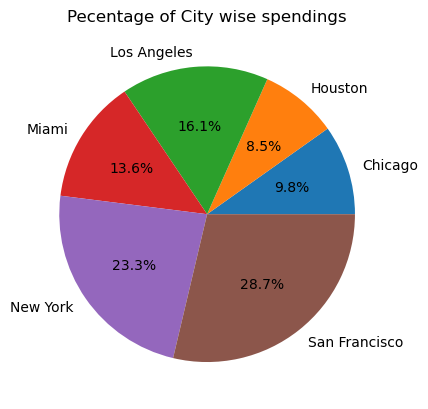

In [16]:
### Pie Chart of city wise total spendings 

plt.title("Pecentage of City wise spendings")
x=df[['City','Total Spend']].groupby('City').sum().index
y=df[['City','Total Spend']].groupby('City').sum()['Total Spend']
plt.pie(y,autopct='%1.1f%%',labels=x)
plt.show()

### Insights

From the above pie chart
    
    1. Maximum percentage of spendings are coming from San Francisco i.e 28.7%
    
    2. Minimum percentage of spendings are coming from Houston i.e 8.5%

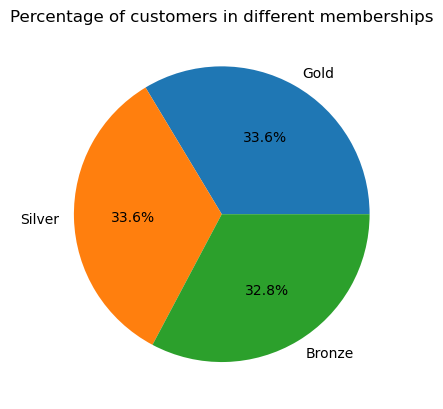

In [17]:
### Pie chart of customers in different memberships

plt.title('Percentage of customers in different memberships')
plt.pie(df['Membership Type'].value_counts(),autopct='%1.1f%%',labels=df['Membership Type'].value_counts().index)
plt.show()

### Insights

From the above pie chart
    
    1. Percentage of customers in gold and silver is 33.6% each.
    
    2. Percentage of customers in bronze membership is 32.8%.

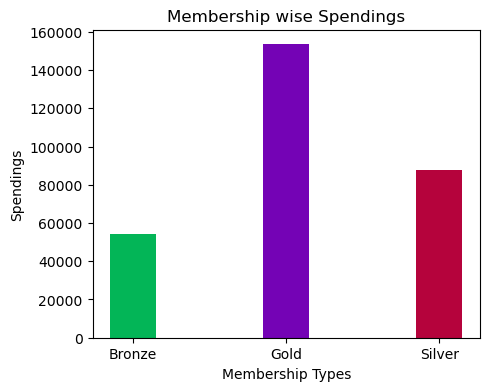

In [18]:
### Bar graph between memberships and spendings

x=df[['Membership Type','Total Spend']].groupby('Membership Type').sum().reset_index()['Membership Type']
y=df[['Membership Type','Total Spend']].groupby('Membership Type').sum().reset_index()['Total Spend']
plt.figure(figsize=(5,4))
plt.title('Membership wise Spendings')
plt.bar(x=x,height=y,color=('#03B557','#7403B5','#B5033C'),width=0.3)
plt.xlabel('Membership Types')
plt.ylabel('Spendings')
plt.show()

### Insights

From the above bar graph
    
    1. Gold members spend more than that of Silver and Bronze
    
    2. Silver members spend less than that of Gold but more than that of Bronze
    
    3. Bronze members spend less than that of Gold and silver

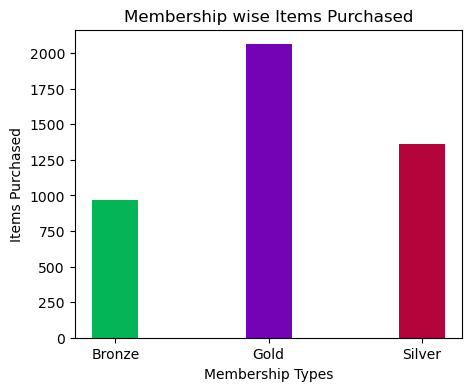

In [19]:
### Bar graph between memberships and items purchased

x=df[['Membership Type','Items Purchased']].groupby('Membership Type').sum().index
y=df[['Membership Type','Items Purchased']].groupby('Membership Type').sum()['Items Purchased']
plt.figure(figsize=(5,4))
plt.title('Membership wise Items Purchased')
plt.bar(x=x,height=y,color=('#03B557','#7403B5','#B5033C'),width=0.3)
plt.xlabel('Membership Types')
plt.ylabel('Items Purchased')
plt.show()

### Insights

From the above bar graph
    
    1. Gold members purchased more items than Silver and Bronze
    
    2. Silver members purchased less items than Gold but more than that of Bronze
    
    3. Bronze members purchased less items than Gold and silver

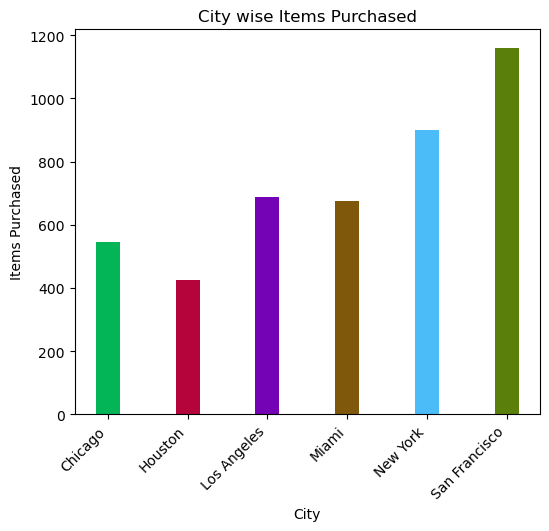

In [20]:
### Bar graph between city and items purchased

x=df[['City','Items Purchased']].groupby('City').sum().index
y=df[['City','Items Purchased']].groupby('City').sum()['Items Purchased']
plt.figure(figsize=(6,5))
plt.title('City wise Items Purchased')
plt.bar(x=x,height=y,color=('#03B557','#B5033C','#7403B5','#7F580B','#4CBCF8','#5A7F0B'),width=0.3)
plt.xticks(rotation=45,ha='right')
plt.xlabel('City')
plt.ylabel('Items Purchased')
plt.show()

### Insights

From the above bar graph
    
    1. Items purchased from San Francisco is maximum.
    
    2. Items purchased from Houston is minimum.

## Preparation for Machine Learning Model
    
    1. By using data encoding change all the categorical data to numerical data
    
    2. After conversion remove all the categorical data from the main dataset
    
    3. Checking the outliers and removal process of outliers
    
    4. Feature selection by using correlation between features

In [21]:
### Data Encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
df_encoded=pd.DataFrame(encoder.fit_transform(df[['Gender','City','Membership Type','Discount Applied']]).toarray(),
             columns=encoder.get_feature_names_out())

In [22]:
df_encoded

,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
344,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
345,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
346,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
df=pd.concat([df,df_encoded],axis=1)

In [24]:
df.drop(['Gender','City','Membership Type','Discount Applied'],axis=1,inplace=True)

In [25]:
df.head()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Satisfaction Level,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True
0,101,29,1120.20,14,4.6,25,Satisfied,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,102,34,780.50,11,4.1,18,Neutral,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,103,43,510.75,9,3.4,42,Unsatisfied,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,104,30,1480.30,19,4.7,12,Satisfied,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,105,27,720.40,13,4.0,55,Unsatisfied,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Insights

    From the above codes we convert all the categorical feature to numerical features by using onehotencoding and once they are converted we remove categorical features from our dataset

In [26]:
### Conversion of Satisfaction level 
df['Satisfaction_level_conversion']=df['Satisfaction Level'].replace({'Satisfied':1,'Neutral':0,'Unsatisfied':-1})

In [27]:
df[['Satisfaction Level','Satisfaction_level_conversion']]

,Satisfaction Level,Satisfaction_level_conversion
0,Satisfied,1
1,Neutral,0
2,Unsatisfied,-1
3,Satisfied,1
4,Unsatisfied,-1
...,...,...
343,Unsatisfied,-1
344,Neutral,0
345,Satisfied,1
346,Neutral,0


### Insights
    
    For conversion of satisfaction level we used replace method and after doing replacing satisfied converted into 1, 
    neutral converted into 0 and unsatisfied converted into -1

In [28]:
df.drop(['Satisfaction Level'],axis=1,inplace=True)

In [29]:
df

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,Satisfaction_level_conversion
0,101,29,1120.20,14,4.6,25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,102,34,780.50,11,4.1,18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,103,43,510.75,9,3.4,42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1
3,104,30,1480.30,19,4.7,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,105,27,720.40,13,4.0,55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,446,32,660.30,10,3.8,42,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
344,447,36,470.50,8,3.0,27,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
345,448,30,1190.80,16,4.5,28,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
346,449,34,780.20,11,4.2,21,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


### Important Observation
    
    Customer ID is not useful for our ML model

In [30]:
df.drop('Customer ID',axis=1,inplace=True)

In [31]:
### Independent and dependent dataset

X=df.drop(['Satisfaction_level_conversion'],axis=1)
y=df['Satisfaction_level_conversion']

In [32]:
### Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((261, 18), (87, 18), (261,), (87,))

## Check for multicollinearity

Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.

In [33]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [34]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [35]:
corr_features

{'Average Rating',
 'Discount Applied_True',
 'Gender_Male',
 'Items Purchased',
 'Membership Type_Gold'}

In [36]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((261, 13), (87, 13))

In [37]:
### Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier()
dtclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=dtclf.predict(X_test)

In [39]:
import sklearn.metrics as metrics
print("Accuracy is :", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision is :", "%.6f" % metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall is :", "%.6f" % metrics.recall_score(y_test, y_pred,average='micro'))
print("F1 Score is :", "%.6f" % metrics.f1_score(y_test, y_pred,average='micro'))

Accuracy is : 0.988506
Precision is : 0.988506
Recall is : 0.988506
F1 Score is : 0.988506


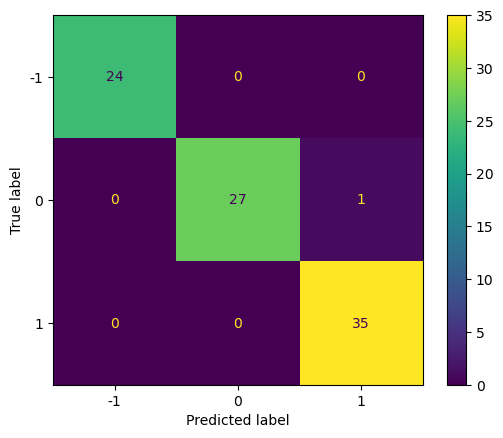

In [40]:
### Confusion metrics
cm = metrics.confusion_matrix(y_test, y_pred, labels = dtclf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dtclf.classes_)
disp.plot()

## Insights from the above code and graphs 

1- For training and testing the data we used Decission Tree Classifier.

2- By logistice regression we got Accuracy, Precision, Recall, and F1 Score is 0.988506.

In [47]:
### Hyperparameter tunning
parameter={'criterion':('gini', 'entropy', 'log_loss'),
           'splitter':('best', 'random'),
           'max_depth':np.linspace(1,100,10,dtype=int),
           'max_features':('auto', 'sqrt', 'log2')}

from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(dtclf,param_grid=parameter,scoring='accuracy',cv=5)

In [48]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100]),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [49]:
y_gs_pred=gscv.predict(X_test)

In [50]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'splitter': 'best'}

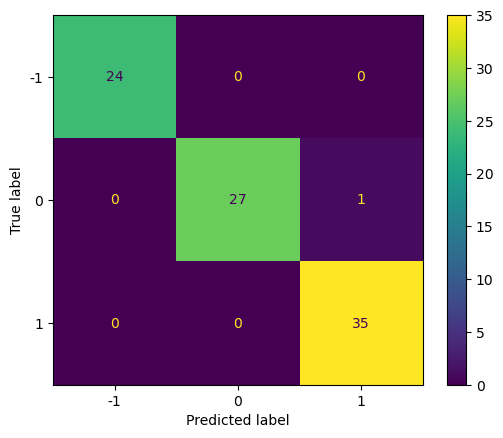

In [51]:
### Confusion metrics
cm = metrics.confusion_matrix(y_test, y_gs_pred, labels = dtclf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dtclf.classes_)
disp.plot()

In [52]:
print("Accuracy is :", "%.6f" % metrics.accuracy_score(y_test, y_gs_pred))
print("Precision is :", "%.6f" % metrics.precision_score(y_test, y_gs_pred,average='micro'))
print("Recall is :", "%.6f" % metrics.recall_score(y_test, y_gs_pred,average='micro'))
print("F1 Score is :", "%.6f" % metrics.f1_score(y_test, y_gs_pred,average='micro'))

Accuracy is : 0.988506
Precision is : 0.988506
Recall is : 0.988506
F1 Score is : 0.988506


## Insights from the above code and graphs 

1- For hyperparameter tunning we used different parameters and out of them we got the best parameter for our model and i.e criterion is gini, max_depth is 12, max_features is auto, and splitter is best.

2- After hyperparameter tunning we again got Accuracy, Precision, Recall, and F1 Score is 0.988506